In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, hamming_loss, jaccard_score, roc_auc_score, roc_curve, auc
from scipy.stats import chi2_contingency

# importing model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier




In [2]:
# Load dataset
file_path = "C:/Users/91749/Downloads/Goa University Dissertation (1).xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Onsite Form Responses ")

In [3]:
# Strip column names
df.columns = df.columns.str.strip()

# List of columns to clean
cols_to_clean = [
    'State/Country',
    'Gender:',
    'Are you camping at the Basilica?',
    'Age groups',
    'Type of visitors',
    'walking pilgrim'
]

# Apply strip and lower to each column in the list
for col in cols_to_clean:
    df[col] = df[col].apply(lambda x: str(x).strip().lower())
print(df.columns)

Index(['Timestamp', 'Your Age', 'Gender:',
       'State of Residence in India/ Country', 'Event Attending',
       'How many years (approx) have you been visiting the Basilica?',
       'Are you camping at the Basilica?',
       'I agree to have my information used only for research purposes.',
       'walking pilgrim', 'State/Country', 'Region', 'Age groups',
       'No of times visited', 'Type of visitors', 'Country', 'Column 1'],
      dtype='object')


In [4]:
#Rename Columns
df.rename(columns={
    'Are you camping at the Basilica?': 'camping',
    'Type of visitors': 'Visitor frequency',
    'Event Attending': 'Event',
    'Gender:': 'Gender'
}, inplace=True)


In [5]:
# Extract useful components of date
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['Is_Feast_Day'] = df['Timestamp'].isin(['2024-12-03']).astype(int)  # Add your feast dates

In [6]:
#Checks if value is missing, split the string on commas and makes into list of items, and tims whitespace for each item in list

df['Event'] = df['Event'].apply(lambda x: [i.strip() for i in x.split(',')] if pd.notna(x) else [])
print(df['Event'].head(5)) 

0                         [Veneration of Relics, Mass]
1                [Fair / Cultural Event / Sightseeing]
2    [Veneration of Relics, Mass, Fair / Cultural E...
3    [Veneration of Relics, Mass, Fair / Cultural E...
4    [Veneration of Relics, Mass, Fair / Cultural E...
Name: Event, dtype: object


In [7]:
# Create new columns for each event
df['Veneration_of_Relics'] = df['Event'].apply(lambda x: 1 if 'Veneration of Relics' in x else 0)
df['Mass'] = df['Event'].apply(lambda x: 1 if 'Mass' in x else 0)
df['Fair/Cultural_Event/Sightseeing'] = df['Event'].apply(lambda x: 1 if 'Fair / Cultural Event / Sightseeing' in x else 0)
df['Walking_pilgrimage'] = df['Event'].apply(lambda x: 1 if 'Walking pilgrimage' in x else 0)



C:\Users\91749\AppData\Local\Temp\ipykernel_31064\679445017.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = (df).corr()


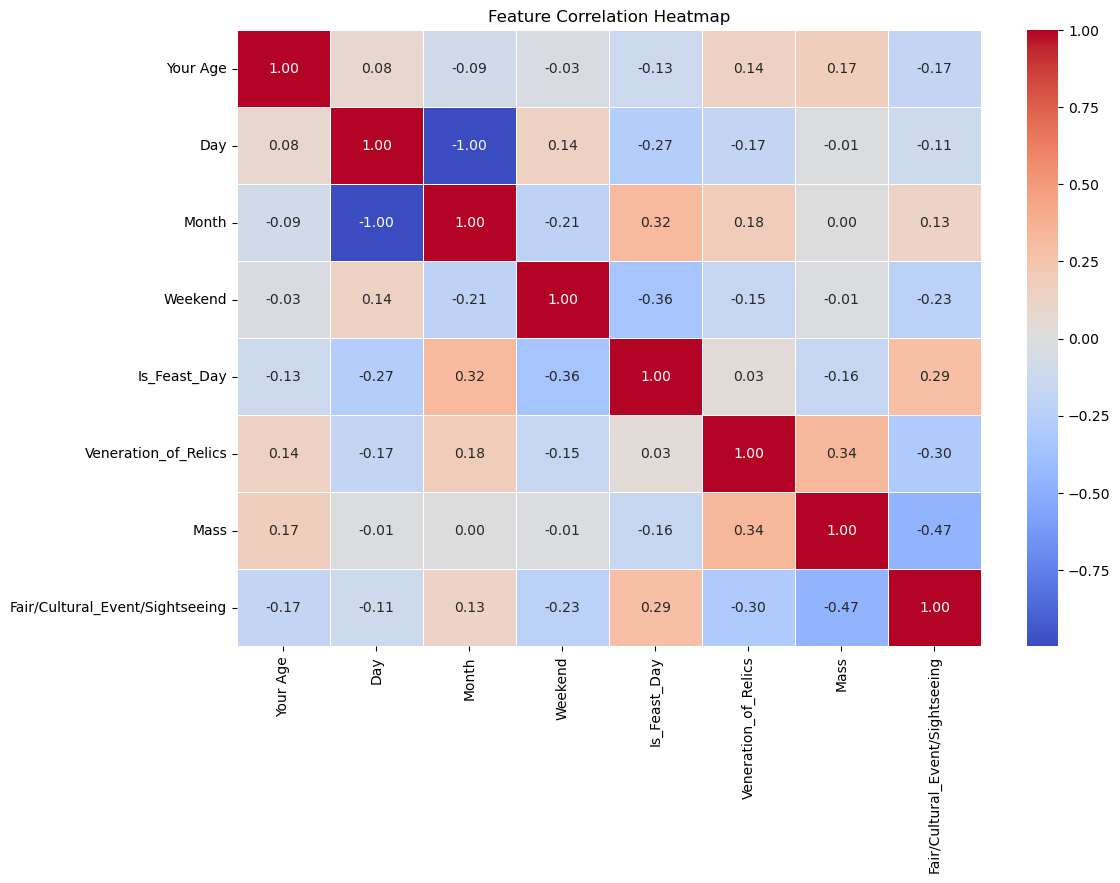

In [9]:
##y = df[['Fair/Cultural Event/Sightseeing']]
#y = df[['Event Attending']]
#  Correlation Heatmap
df = df.drop(columns=['Column 1', 'Walking_pilgrimage','Weekday'])
plt.figure(figsize=(12, 8))
corr_matrix = (df).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cols_to_encode = [
    'Gender',
    'State/Country',
    'camping',
    'Age groups',
    'Visitor frequency',
    'walking pilgrim'
]

# Dictionary to store encoders
encoders = {}

# Apply LabelEncoder to each column
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder in case you need to inverse transform later


In [13]:
# Define features and labels
X = df[['Age groups', 'Gender', 'State/Country', 'Visitor frequency', 'camping', 'Weekend', 'Is_Feast_Day']]
y = df[['Fair/Cultural_Event/Sightseeing','Veneration_of_Relics', 'Mass']]

In [16]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


--- Random Forest Classifier ---


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.74      0.76      0.75       369
           Veneration_of_Relics       0.79      0.76      0.78       472
                           Mass       0.71      0.74      0.72       316

                      micro avg       0.75      0.76      0.75      1157
                      macro avg       0.75      0.75      0.75      1157
                   weighted avg       0.75      0.76      0.75      1157
                    samples avg       0.72      0.73      0.70      1157

Accuracy Score: 0.4723076923076923
Hamming Loss: 0.2923076923076923
Jaccard Score (macro): 0.601571477435744
AUC-ROC Score (macro): 0.7583040206908088


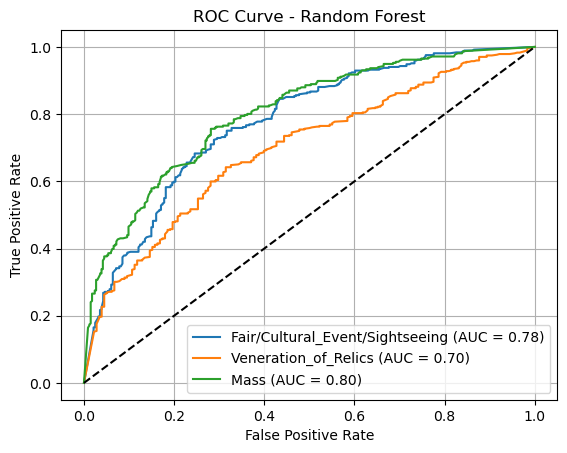


--- Decision Tree Classifier ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.75      0.70      0.72       369
           Veneration_of_Relics       0.81      0.77      0.79       472
                           Mass       0.70      0.71      0.70       316

                      micro avg       0.76      0.73      0.75      1157
                      macro avg       0.75      0.73      0.74      1157
                   weighted avg       0.76      0.73      0.75      1157
                    samples avg       0.71      0.71      0.68      1157

Accuracy Score: 0.4307692307692308
Hamming Loss: 0.2964102564102564
Jaccard Score (macro): 0.5882813837401999
AUC-ROC Score (macro): 0.7168832986241221


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


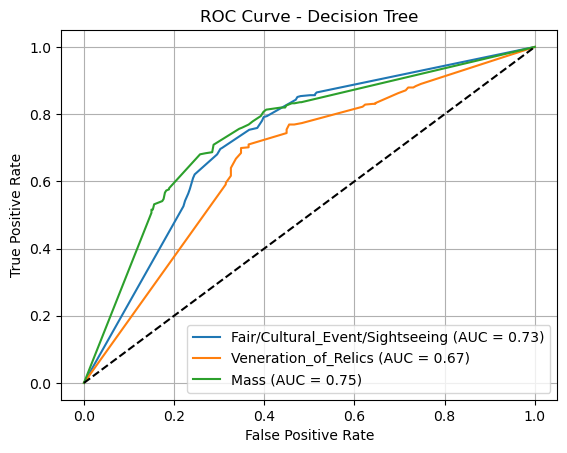


--- Logistic Regression Classifier ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.70      0.75      0.72       369
           Veneration_of_Relics       0.74      0.94      0.82       472
                           Mass       0.70      0.63      0.66       316

                      micro avg       0.72      0.79      0.75      1157
                      macro avg       0.71      0.77      0.74      1157
                   weighted avg       0.71      0.79      0.75      1157
                    samples avg       0.69      0.78      0.70      1157

Accuracy Score: 0.36
Hamming Loss: 0.30923076923076925
Jaccard Score (macro): 0.5867190535540536
AUC-ROC Score (macro): 0.6970839057828494


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


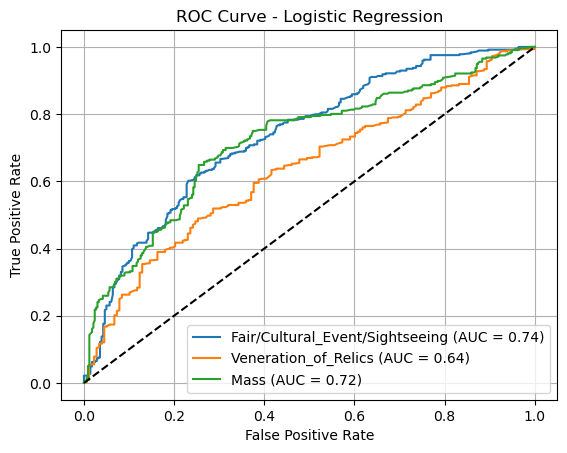


--- Support Vector Machine Classifier ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.64      0.83      0.72       369
           Veneration_of_Relics       0.73      1.00      0.84       472
                           Mass       0.72      0.54      0.62       316

                      micro avg       0.70      0.82      0.75      1157
                      macro avg       0.70      0.79      0.73      1157
                   weighted avg       0.70      0.82      0.74      1157
                    samples avg       0.69      0.82      0.72      1157

Accuracy Score: 0.35384615384615387
Hamming Loss: 0.3194871794871795
Jaccard Score (macro): 0.5801973224838436
AUC-ROC Score (macro): 0.6747538715051163


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


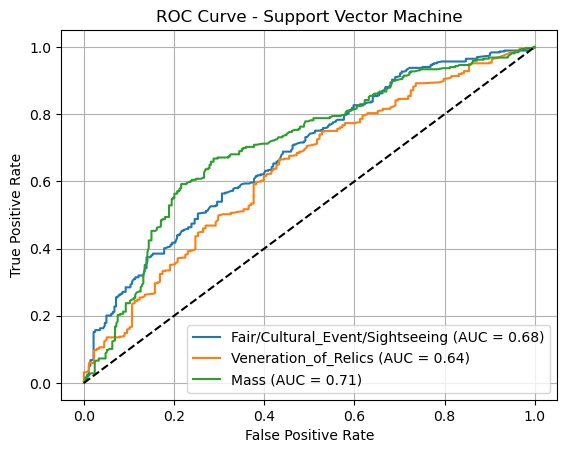


--- k-Nearest Neighbors Classifier ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.71      0.76      0.74       369
           Veneration_of_Relics       0.78      0.80      0.79       472
                           Mass       0.71      0.71      0.71       316

                      micro avg       0.74      0.76      0.75      1157
                      macro avg       0.73      0.76      0.74      1157
                   weighted avg       0.74      0.76      0.75      1157
                    samples avg       0.71      0.74      0.70      1157

Accuracy Score: 0.42615384615384616
Hamming Loss: 0.301025641025641
Jaccard Score (macro): 0.5941302636088978
AUC-ROC Score (macro): 0.7337958330952837


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


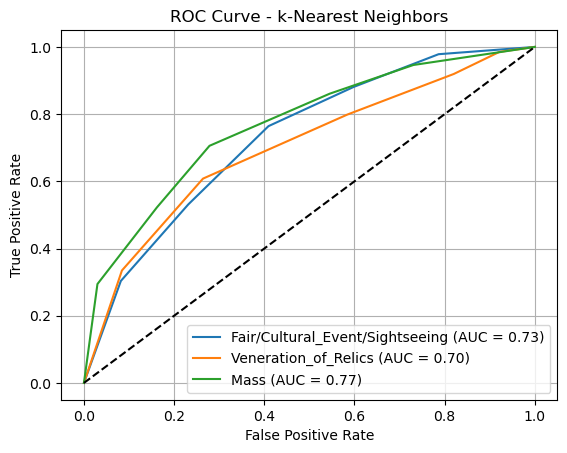


--- Gradient Boosting Classifier ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.71      0.86      0.78       369
           Veneration_of_Relics       0.79      0.93      0.85       472
                           Mass       0.77      0.70      0.73       316

                      micro avg       0.76      0.84      0.80      1157
                      macro avg       0.76      0.83      0.79      1157
                   weighted avg       0.76      0.84      0.80      1157
                    samples avg       0.75      0.84      0.77      1157

Accuracy Score: 0.49846153846153846
Hamming Loss: 0.2523076923076923
Jaccard Score (macro): 0.6528734861841702
AUC-ROC Score (macro): 0.7920579927977135


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


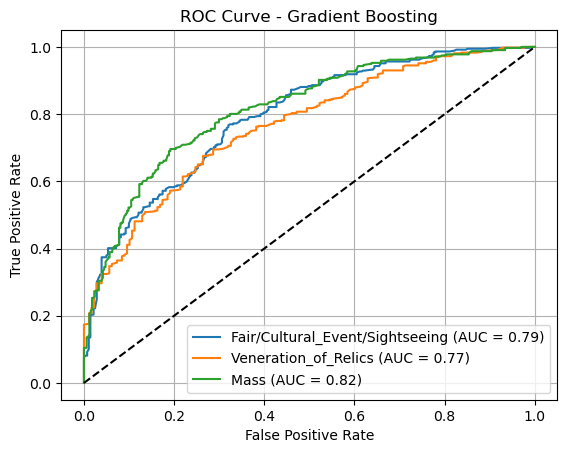

In [ ]:
# Function to plot ROC Curve for multi-label

def plot_multilabel_roc(y_test, y_score, title, class_names):
    n_classes = y_test.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# List of models
models = {
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    "Decision Tree": MultiOutputClassifier(OneVsRestClassifier(DecisionTreeClassifier(random_state=42))),
    "Logistic Regression": MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(max_iter=1000))),
    "Support Vector Machine": MultiOutputClassifier(OneVsRestClassifier(SVC(probability=True))),
    "k-Nearest Neighbors": MultiOutputClassifier(KNeighborsClassifier()),
    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier())

}

# Evaluate each model
for name, model in models.items():
    print(f"\n--- {name} Classifier ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Try-except for predict_proba
    try:
        y_score = model.predict_proba(X_test)
        y_score = np.array([prob[:, 1] for prob in y_score]).T
        supports_proba = True
    except AttributeError:
        y_score = y_pred
        supports_proba = False

    print(classification_report(y_test, y_pred, target_names=y.columns))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average='macro'))

    if supports_proba:
        print("AUC-ROC Score (macro):", roc_auc_score(y_test, y_score, average='macro'))
        plot_multilabel_roc(y_test, y_score, name, y.columns)
        importances = rf_model.estimators_[0].feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print('Feature Importance\n',feature_importance)


--- Random Forest ---


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\m

                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.74      0.76      0.75       369
           Veneration_of_Relics       0.79      0.76      0.78       472
                           Mass       0.71      0.74      0.72       316

                      micro avg       0.75      0.76      0.75      1157
                      macro avg       0.75      0.75      0.75      1157
                   weighted avg       0.75      0.76      0.75      1157
                    samples avg       0.72      0.73      0.70      1157

Accuracy Score: 0.4723076923076923
Hamming Loss: 0.2923076923076923
Jaccard Score (macro): 0.6016
F1 Score (samples): 0.7009

--- Decision Tree ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.75      0.70      0.72       369
           Veneration_of_Relics       0.81      0.77      0.79       472
                           Mass       0.70   

c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.70      0.75      0.72       369
           Veneration_of_Relics       0.74      0.94      0.82       472
                           Mass       0.70      0.63      0.66       316

                      micro avg       0.72      0.79      0.75      1157
                      macro avg       0.71      0.77      0.74      1157
                   weighted avg       0.71      0.79      0.75      1157
                    samples avg       0.69      0.78      0.70      1157

Accuracy Score: 0.36
Hamming Loss: 0.30923076923076925
Jaccard Score (macro): 0.5867
F1 Score (samples): 0.7022

--- Support Vector Machine ---


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.64      0.83      0.72       369
           Veneration_of_Relics       0.73      1.00      0.84       472
                           Mass       0.72      0.54      0.62       316

                      micro avg       0.70      0.82      0.75      1157
                      macro avg       0.70      0.79      0.73      1157
                   weighted avg       0.70      0.82      0.74      1157
                    samples avg       0.69      0.82      0.72      1157

Accuracy Score: 0.35384615384615387
Hamming Loss: 0.3194871794871795
Jaccard Score (macro): 0.5802
F1 Score (samples): 0.7201

--- k-Nearest Neighbors ---
                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.71      0.76      0.74       369
           Veneration_of_Relics       0.78      0.80      0.79       472
                           Mass       

c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.71      0.86      0.78       369
           Veneration_of_Relics       0.79      0.93      0.85       472
                           Mass       0.77      0.70      0.73       316

                      micro avg       0.76      0.84      0.80      1157
                      macro avg       0.76      0.83      0.79      1157
                   weighted avg       0.76      0.84      0.80      1157
                    samples avg       0.75      0.84      0.77      1157

Accuracy Score: 0.49846153846153846
Hamming Loss: 0.2523076923076923
Jaccard Score (macro): 0.6529
F1 Score (samples): 0.7668


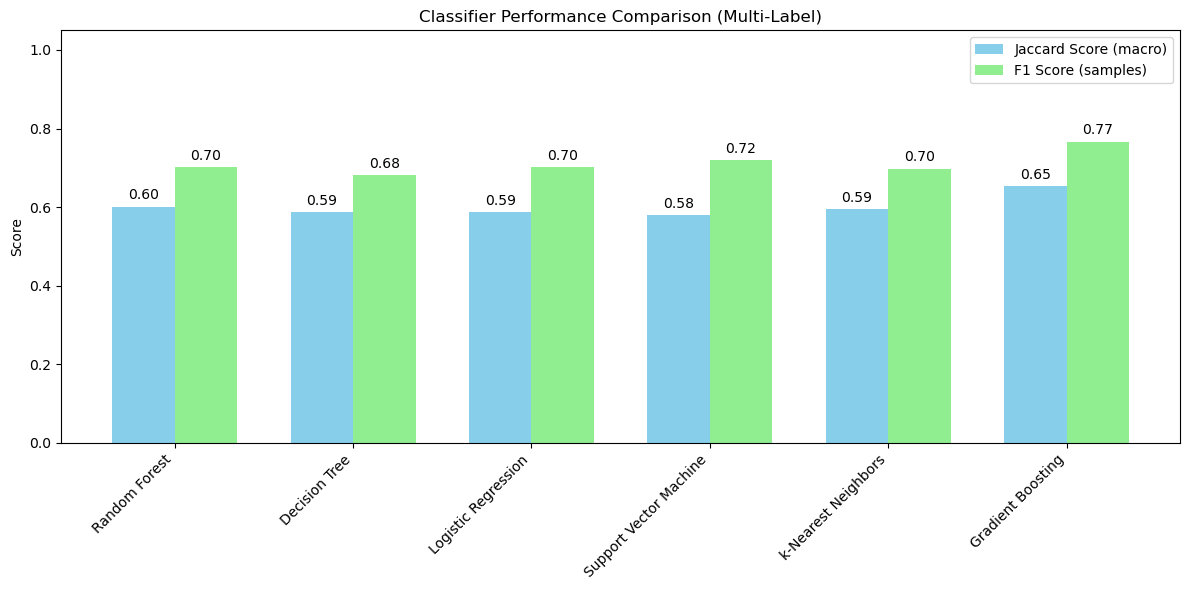

In [33]:
from sklearn.metrics import (
    accuracy_score, classification_report, hamming_loss,
    jaccard_score, f1_score
)
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

# Define models
models = {
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Decision Tree': MultiOutputClassifier(OneVsRestClassifier(DecisionTreeClassifier(random_state=42))),
    'Logistic Regression': MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(max_iter=1000))),
    'Support Vector Machine': MultiOutputClassifier(OneVsRestClassifier(SVC(probability=True))),
    'k-Nearest Neighbors': MultiOutputClassifier(KNeighborsClassifier()),
    'Gradient Boosting': MultiOutputClassifier(GradientBoostingClassifier())
}

# Initialize lists to collect scores
model_names = []
jaccard_scores = []
f1_scores = []

# Evaluate models
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Collect performance metrics
    jaccard = jaccard_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='samples')

    print(classification_report(y_test, y_pred, target_names=y.columns))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print(f"Jaccard Score (macro): {jaccard:.4f}")
    print(f"F1 Score (samples): {f1:.4f}")

    # Save for comparison graph
    model_names.append(name)
    jaccard_scores.append(jaccard)
    f1_scores.append(f1)

# Plot comparison
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, jaccard_scores, width, label='Jaccard Score (macro)', color='skyblue')
bar2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score (samples)', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Classifier Performance Comparison (Multi-Label)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylim(0, 1.05)
ax.legend()

# Annotate bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


                              Event          Predictor  Chi2 p-value  \
17                             Mass  Visitor frequency        0.0000   
2   Fair/Cultural_Event/Sightseeing      State/Country        0.0000   
9              Veneration_of_Relics      State/Country        0.0000   
16                             Mass      State/Country        0.0000   
18                             Mass            camping        0.0000   
6   Fair/Cultural_Event/Sightseeing       Is_Feast_Day        0.0000   
3   Fair/Cultural_Event/Sightseeing  Visitor frequency        0.0000   
0   Fair/Cultural_Event/Sightseeing         Age groups        0.0000   
5   Fair/Cultural_Event/Sightseeing            Weekend        0.0000   
14                             Mass         Age groups        0.0000   
11             Veneration_of_Relics            camping        0.0000   
4   Fair/Cultural_Event/Sightseeing            camping        0.0000   
20                             Mass       Is_Feast_Day        0.

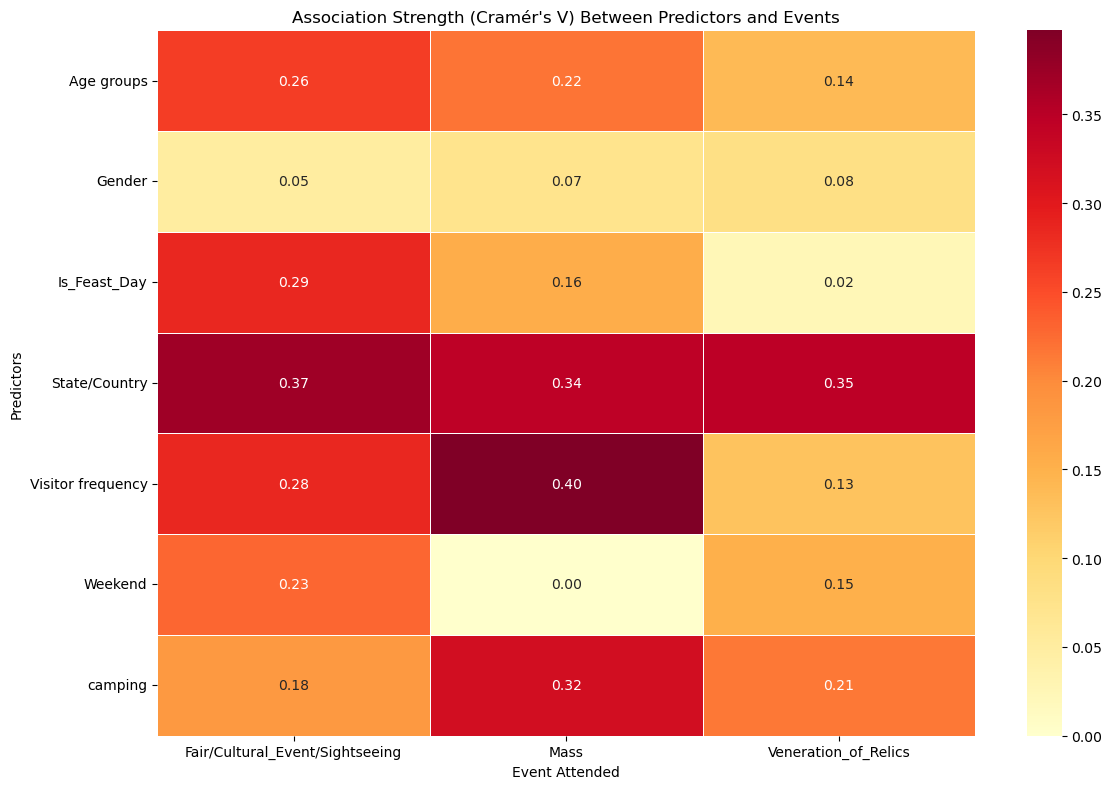

In [29]:
# 1. Convert Event column to binary multi-label
def prepare_event_columns(df, event_col="Event Attending"):
    df[event_col] = df[event_col].fillna("").apply(lambda x: [e.strip() for e in x.split(',')])
    mlb = MultiLabelBinarizer()
    event_df = pd.DataFrame(mlb.fit_transform(df[event_col]), columns=mlb.classes_, index=df.index)
    df = pd.concat([df.drop(columns=[event_col]), event_df], axis=1)
    return df, mlb.classes_

# 2. Cramér’s V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# 3. Analyze associations
def analyze_event_associations(df, event_cols, predictors):
    results = []
    for event in event_cols:
        for predictor in predictors:
            try:
                contingency = pd.crosstab(df[predictor], df[event])
                chi2, p, _, _ = chi2_contingency(contingency)
                v = cramers_v(df[predictor], df[event])
                results.append({
                    'Event': event,
                    'Predictor': predictor,
                    'Chi2 p-value': round(p, 4),
                    'Cramér\'s V': round(v, 4)
                })
            except Exception as e:
                print(f"Error with {predictor} and {event}: {e}")
    return pd.DataFrame(results).sort_values(by="Cramér's V", ascending=False)
# 4. Analyze associations
association_results = analyze_event_associations(df, y, X)

# 5. View results
print(association_results)

# Pivot the results to a matrix format suitable for a heatmap
heatmap_data = association_results.pivot(index='Predictor', columns='Event', values="Cramér's V")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', linewidths=0.5, fmt=".2f")
plt.title("Association Strength (Cramér's V) Between Predictors and Events")
plt.ylabel("Predictors")
plt.xlabel("Event Attended")
plt.tight_layout()
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
